In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten

Tensorflow backend # https://keras.io/api/applications/   List of available models to use for images.  

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator  
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

note: VGG16 was created to use 224 224. 

In [5]:
IMAGE_SIZE = [224, 224] 

train_path = '/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/'
test_path = '/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/'

if we have black and white images use 1 vs 3"

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

We do not have to train vgg16 layers since they have already been trained.  

In [7]:
# https://stackoverflow.com/questions/61292890/transfer-learning-only-works-with-trainable-set-to-false
for layer in vgg.layers:
    layer.trainable = False 

In [8]:
# https://stackoverflow.com/questions/2186525/how-to-use-glob-to-find-files-recursively
folders = glob('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/*')
x = Flatten() (vgg.output)

In [9]:
# this adds the folder names (NORMAL, PNEMONIA) as the two classes.  softmax is used for vgg16 vs sigmoid.  
prediction = Dense(len(folders), activation='softmax') (x)  
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

compiling model

In [10]:
# https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
# note: must input code received from google for access to the google drive files: Please copy this code, switch to your application and paste it there:
# 4/1AX4XfWgMbu2qOfhAjCXU90DNP_Yx7EFgJsSBJrHiKfPqnwomhdAgQZxkp3o
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Creating Generators - available in the Keras website

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size ("reads the folder name for different classes NORMAL and PNEMONIA")
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Building and Fitting Model

In [15]:
r = model.fit_generator(   
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  workers=-1,
) 

Epoch 1/40
522/522 [==============================] - 325s 622ms/step - loss: 0.2113 - accuracy: 0.9224 - val_loss: 0.3579 - val_accuracy: 0.8974
Epoch 2/40
522/522 [==============================] - 332s 636ms/step - loss: 0.2078 - accuracy: 0.9367 - val_loss: 0.5091 - val_accuracy: 0.8958
Epoch 3/40
522/522 [==============================] - 336s 644ms/step - loss: 0.1494 - accuracy: 0.9546 - val_loss: 0.3133 - val_accuracy: 0.9054
Epoch 4/40
522/522 [==============================] - 337s 645ms/step - loss: 0.1733 - accuracy: 0.9488 - val_loss: 0.5392 - val_accuracy: 0.8654
Epoch 5/40
522/522 [==============================] - 336s 644ms/step - loss: 0.1718 - accuracy: 0.9544 - val_loss: 0.2939 - val_accuracy: 0.9135
Epoch 6/40
522/522 [==============================] - 337s 645ms/step - loss: 0.1291 - accuracy: 0.9617 - val_loss: 0.5352 - val_accuracy: 0.8558
Epoch 7/40
522/522 [==============================] - 337s 645ms/step - loss: 0.1359 - accuracy: 0.9590 - val_loss: 0.3646 -

In [16]:
 import tensorflow as tf
from keras.models import load_model
# from google.colab import drive
# drive.mount()
# %cd /gdrive
model.save('/gdrive/My Drive/input/chest_xray_40_Epochs.h5')

In [17]:
from keras.models import load_model

In [18]:
from keras.preprocessing import image

In [19]:
from keras.applications.vgg16 import preprocess_input

In [20]:
import numpy as np

In [21]:
# from keras.models import load_model
model=load_model('/gdrive/My Drive/input/chest_xray_40_Epochs.h5')

In [22]:
model.compile(metrics=[tf.keras.metrics.Recall()])

In [23]:
model.evaluate(test_set, return_dict=True, use_multiprocessing=True, workers=-1)

63/63 [==============================] - 29s 451ms/step - loss: 0.0000e+00 - recall: 0.9087


{'loss': 0.0, 'recall': 0.9086538553237915}

In [24]:
#conf_matrix = tf.math.confusion_matrix(labels=test_set,
predictions=model.predict(test_set, workers=-1)
print(predictions[:])

[[7.9825027e-03 9.9201751e-01]
 [9.9999785e-01 2.1656838e-06]
 [3.3246566e-15 1.0000000e+00]
 ...
 [4.6410814e-13 1.0000000e+00]
 [9.9998343e-01 1.6573065e-05]
 [1.2322123e-18 1.0000000e+00]]


In [25]:
# test_set.classes[:]

In [26]:
rnd_predictions = [round(pred[1]) for pred in predictions]
# np.array(rnd_predictions)[:]

In [27]:
# pred_labels = np.array(rnd_predictions) >= 0.5
# pred_labels

Results

In [28]:
conf_matrix = tf.math.confusion_matrix(labels=test_set.classes, predictions=np.array(rnd_predictions))
conf_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 73, 161],
       [116, 274]], dtype=int32)>

In [29]:
# test_set.classes

In [30]:
img=image.load_img('/gdrive/My Drive/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/person20_virus_51.jpeg',target_size=(224,224))

In [31]:
x=image.img_to_array(img)

In [32]:
x=np.expand_dims(x, axis=0)

In [33]:
img_data=preprocess_input(x)

In [34]:
classes=model.predict(img_data)

In [35]:
# classes
result=int(classes[0][1])

In [36]:
classes

array([[0., 1.]], dtype=float32)

In [37]:
if result==0:
  print("X-Ray results are Normal")
else:
  print("X-Ray results indicate Pneumonia")
  

X-Ray results indicate Pneumonia


In [38]:
result

1

Explanation of Classes - First Column Prediction: result score: 0 = Pnemonia and 1 = Normal,   Second Column Actual x-Ray: 1 = Pneumonia and 0 = Normal

In [39]:
classes

array([[0., 1.]], dtype=float32)

Additional Metrics and Plots

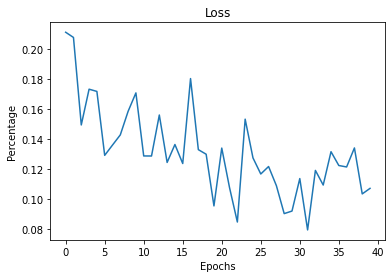

In [40]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['loss'])

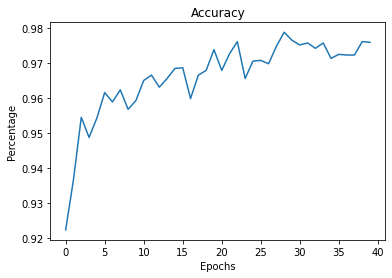

In [41]:
import matplotlib.pyplot as plt
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['accuracy'])

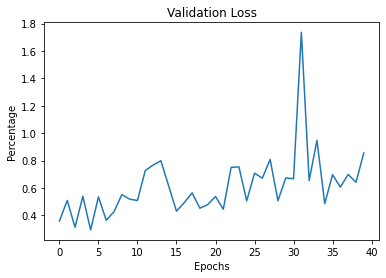

In [42]:
import matplotlib.pyplot as plt
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['val_loss'])

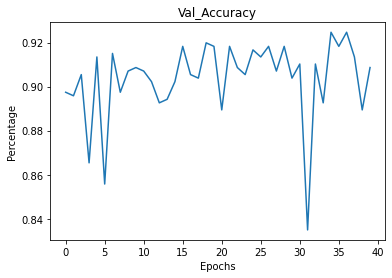

In [43]:
import matplotlib.pyplot as plt
plt.title('Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.plot(r.history['val_accuracy'])

In [44]:
true_labels = test_set.labels
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
pred_labels = [round(pred[1]) for pred in predictions]
pred_labels = np.array(pred_labels)[:]
pred_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, pred_labels)

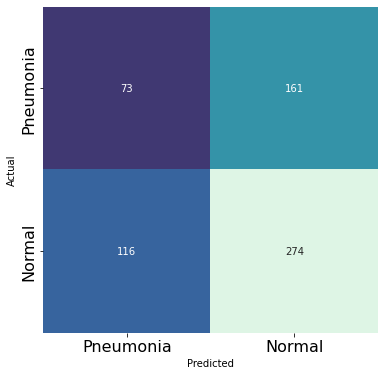

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2) + 0.5, ['Pneumonia', 'Normal'], fontsize=16)
plt.yticks(np.arange(2) + 0.5, ['Pneumonia', 'Normal'], fontsize=16)
plt.show()

In [48]:
results = model.evaluate(test_set, verbose=0)
accuracy = results[1]

In [49]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [50]:
print ("Accuracy: {:.2f}".format(accuracy))
print ("Precision: {:.2f}".format(precision))
print ("Recall: {:.2f}".format(recall)) 

Accuracy: 0.91
Precision: 0.63
Recall: 0.70


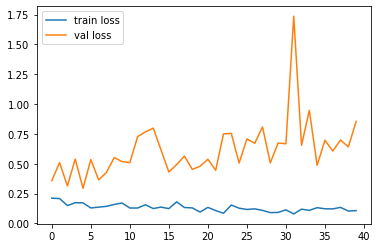

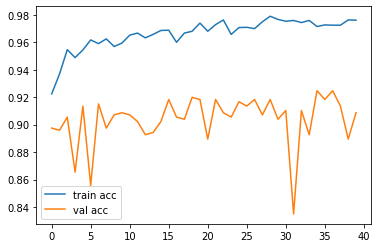

In [51]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')